In [ ]:
from pandas_datareader import data 
import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np
from scipy.stats import norm 
import pyfolio as pf 

from matplotlib.ticker import FuncFormatter
%matplotlib inline

C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\huajuan.tan.2019\AppData\Local\Continuum\anaconda3\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [ ]:
# step 1; finding the closes (3m) for current portfolio;
# --
## declare tickers& weights (3m)
portfolio_tickers = ['SPY','AMZN','AAPL'] 
weights = [0.5, 0.5, 0.0]

start_date = '2021-07-01'
end_date = '2021-09-30'
panel_data = data.DataReader(portfolio_tickers,'yahoo', start_date, end_date) 

closes_3m = panel_data[['Close']]
closes_3m = closes_3m.loc[start_date: end_date]
closes_3m

Attributes       Close                         
Symbols            SPY         AMZN        AAPL
Date                                           
2021-07-01  430.429993  3432.969971  137.270004
2021-07-02  433.720001  3510.979980  139.960007
2021-07-06  432.929993  3675.739990  142.020004
2021-07-07  434.459991  3696.580078  144.570007
2021-07-08  430.920013  3731.409912  143.240005
...                ...          ...         ...
2021-09-24  443.910004  3425.520020  146.919998
2021-09-27  442.640015  3405.800049  145.369995
2021-09-28  433.720001  3315.959961  141.910004
2021-09-29  434.450012  3301.120117  142.830002
2021-09-30  429.140015  3285.040039  141.500000

[64 rows x 3 columns]

In [ ]:
# step 2; finding the closes (3m) for sector etf;-> for comparison with weighted_return_series_adj (i.e., current portfolio returns)
# => conduct correlation analysis=> select top 3 inverse sectors for sector rotation analysis;

tickers = ['XLE', 'XLF', 'XLK', 'XLRE', 'XLY', 'XLI', 'XLB', 'XLC', 'XLV', 'XLP', 'XLU'] 
# extract- 3m (for corr; rt- use 2y;)
start_date = '2021-07-01'
end_date = '2021-09-30'

# start_date = '2019-01-01'
# end_date = '2020-12-31'
panel_data = data.DataReader(tickers,'yahoo', start_date, end_date) 
#Use loc method to ensure we do not consider extra days of data panel_data = panel_data.loc['2020-01-01':'2020-12-31']
sector_closes_3m = panel_data[['Close']]
sector_closes_3m = sector_closes_3m.loc[start_date: end_date]

# sector_closes_3m.head()
# closes_3m.isnull().sum()
weighted_closes= pd.DataFrame((weights* closes_3m["Close"]).sum(axis=1))
weighted_closes = weighted_closes.rename(columns={0: 'portfolio'})
all_closes_3m = sector_closes_3m["Close"].join(weighted_closes)
all_closes_3m

,XLE,XLF,XLK,XLRE,XLY,XLI,XLB,XLC,XLV,XLP,XLU,portfolio
Date,,,,,,,,,,,,
2021-07-01,54.810001,36.980000,147.910004,44.509998,179.559998,103.129997,82.760002,81.570000,127.070000,69.760002,63.919998,1931.699982
2021-07-02,54.689999,36.939999,149.860001,44.720001,181.139999,103.290001,82.879997,82.139999,128.289993,69.930000,64.019997,1972.349991
2021-07-06,52.910000,36.360001,150.429993,45.119999,181.350006,102.300003,81.650002,81.940002,128.169998,69.639999,64.290001,2054.334991
2021-07-07,52.049999,36.410000,151.250000,45.349998,181.250000,103.320000,82.500000,81.820000,128.979996,70.010002,64.709999,2065.520035
2021-07-08,51.750000,35.680000,149.820007,45.310001,180.800003,101.879997,81.379997,80.919998,128.270004,69.750000,64.519997,2081.164963
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,50.900002,38.220001,156.710007,45.910000,184.899994,100.849998,81.070000,82.449997,131.979996,70.620003,65.139999,1934.715012
2021-09-27,52.709999,38.740002,155.190002,45.150002,185.889999,100.949997,81.699997,82.440002,130.100006,70.300003,64.370003,1924.220032
2021-09-28,52.889999,38.099998,150.589996,44.880001,182.309998,99.779999,80.690002,80.430000,127.870003,69.470001,63.560001,1874.839981


In [ ]:
# correlation
return_series_close = (all_closes_3m.pct_change()+ 1).cumprod() - 1 
correlation = pd.DataFrame(return_series_close.corr().tail(1).round(3))
correlation

,XLE,XLF,XLK,XLRE,XLY,XLI,XLB,XLC,XLV,XLP,XLU,portfolio
portfolio,0.381,-0.597,-0.219,-0.085,0.365,0.032,-0.27,-0.013,-0.514,-0.339,-0.448,1.0


In [ ]:
# top3_inverse_sectors
correlation = correlation.sort_values(by = "portfolio", axis=1)
top3_inverse_sectors= correlation.columns.tolist()[0:3]
top3_inverse_sectors

['XLF', 'XLV', 'XLU']

In [ ]:
###########################################################
## step 3; compute return_series_adj (2y) for current portfolio 
# (notice; it's diff from prev. extraction where we use 3m (for corr. analysis); explain why we decide to use 2y for return series comparison..)
###########################################################
# portfolio_tickers = ['SPY','AMZN','AAPL'] 
# weights = [0.5, 0.5, 0.0]
start_date = '2019-01-01'
end_date = '2020-12-31'

panel_data = data.DataReader(portfolio_tickers,'yahoo', start_date, end_date) 

closes_2y = panel_data[['Adj Close']]
closes_2y = closes_2y.loc[start_date: end_date]

# // return series for the period and plot the returns on a single chart.
return_series_adj = (closes_2y['Adj Close'].pct_change()+ 1).cumprod() - 1 
# ret_ax = return_series_adj.plot(figsize=(16,9), title= "Total Return")
# ret_ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

#portfolio returns
weighted_return_series_adj_2y = weights* (return_series_adj) 
return_series_adj_2y = weighted_return_series_adj_2y.sum(axis=1)
return_series_adj_2y

Date
2019-01-02    0.000000
2019-01-03   -0.024552
2019-01-04    0.016196
2019-01-07    0.037755
2019-01-08    0.051325
                ...   
2020-12-24    0.796143
2020-12-28    0.838866
2020-12-29    0.849751
2020-12-30    0.839107
2020-12-31    0.833632
Length: 505, dtype: float64

In [ ]:
# step 4; select 3 representative tickers by sectors;
# => append the tickers for top3_inverse_sectors=> which will be used for sector rotation;
# => similarly, extract 2years data (for 'Adj Close')=> later will be doing return series (after markz algo)
sector_dict= {
  'XLB': ['LIN', 'ECL', 'GOLD'],'XLC': ['GOOGL', 'FB', 'NFLX'],'XLY': ['AMZN', 'TSLA', 'NKE'],'XLP': ['KO', 'WMT', 'PEP'],'XLE': ['XOM', 'CVX', 'PSX'],'XLF': ['V', 'MA', 'JPM'],'XLV': ['JNJ', 'PFE', 'UNH'],'XLI': ['HON', 'GE', 'FDX'],'XLR': ['AMT', 'CCI', 'PSA'],'XLK': ['MSFT', 'AAPL', 'CRM'],'XLU': ['NEE', 'DUK', 'XEL']
}

inverse_sector_tickers= []
for t in top3_inverse_sectors:
    for x in sector_dict[t]:
        inverse_sector_tickers.append(x)

# use 2y for rs
start_date = '2019-01-01'
end_date = '2020-12-31'
panel_data = data.DataReader(inverse_sector_tickers,'yahoo', start_date, end_date) 

sector_closes_2y = panel_data[['Adj Close']]
sector_closes_2y = sector_closes_2y.loc[start_date: end_date]
# closes_2y.isnull().sum()

In [ ]:
###########################################################
## step 5; run markz (i.e., Efficient Frontier from Modern Portfolio Theory )
# to determine best allocation for  Maximum sortino Ratio& Minimum Volatility Portfolio Allocation
# showcase return series graphs in tableau (currently dis doc is using sharpe, i think yao updated to sortino for markz theory)
###########################################################
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
###########################################################
##Random Portfolios Generation
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

###########################################################
##Efficient Frontier
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns)* np.sqrt(252)
    an_rt = mean_returns* 252

    ret_list= [round(rp,2), round(sdp,2), max_sharpe_allocation.iloc[0, 0], max_sharpe_allocation.iloc[0, 1], round(rp_min,2), round(sdp_min,2), min_vol_allocation.iloc[0, 0], min_vol_allocation.iloc[0, 1]]

    for i, txt in enumerate(table.columns):
        ret_list.append(round(an_rt[i],2))
        ret_list.append(round(an_vol[i],2))
    ret_list.append(pd.DataFrame(mean_returns).index.tolist()[0])
    return ret_list



In [ ]:
#2y
# portfolio_tickers = ['SPY','AMZN','AAPL'] 
start_date = '2019-01-01'
end_date = '2020-12-31'
panel_data = data.DataReader(portfolio_tickers,'yahoo', start_date, end_date) 
closes_2y = panel_data['Adj Close']
closes_2y = closes_2y.loc[start_date: end_date]


weighted_closes_2y= pd.DataFrame((weights* closes_2y).sum(axis=1))
weighted_closes_2y= weighted_closes_2y.reset_index()
weighted_closes_2y= weighted_closes_2y.rename(columns={"Date": "date", 0: "adj_close"})
weighted_closes_2y["ticker"]= "portfolio"


In [ ]:
# weighted_closes_2y

In [ ]:
sector_res= []
for t in inverse_sector_tickers:

    panel_data= pd.DataFrame()
    t_data = data.DataReader(t,'yahoo', start_date, end_date) 
    
    t_data = t_data.loc[start_date: end_date]
    t_data = t_data[['Adj Close']]
    
    t_data= t_data.reset_index()
    t_data["ticker"]= t
    t_data= t_data.rename(columns={"Date": "date", t_data.columns[1]: "adj_close"})
    panel_data= panel_data.append(t_data)

    
    panel_data= panel_data.append(weighted_closes_2y)
    
    df = panel_data.set_index('date')
#     df.head()
    
    table = df.pivot(columns='ticker')
    table.columns = [col[1] for col in table.columns]
#     table.head()
    
    returns = table.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    
    risk_free_rate = 0.0178
    sector_res.append(display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate))

# #####################################################################  
## content for each sector in ret_list
#####################################################################
# Maximum Sharpe Ratio Portfolio Allocation

# 1) Annualised Return: 0.39
# 2) Annualised Volatility: 0.29
#              JPM  portfolio
# 3) allocation- sector ticker  6.81      
# 4) allocation- portfolio 93.19

#####################################################################
# Minimum Volatility Portfolio Allocation

# 5) Annualised Return: 0.36
# 6) Annualised Volatility: 0.28
#              JPM  portfolio
# 7) allocation- sector ticker  28.11    
# 8) allocation- portfolio 71.89
#####################################################################
# Individual Stock Returns and Volatility

# 9) annuaised return- sector ticker;
# 10) annualised volatility- sector ticker;
# 11) annuaised return- portfolio;
# 12) annualised volatility- portfolio;

# 13) ticker_symbol
#####################################################################

In [ ]:
# panel_data

In [ ]:
# print(sector_res)

In [ ]:
# result = pd.DataFrame(sector_res).to_json(orient="records")
# parsed = json.loads(result)
# json.dumps(parsed, indent=4) 

In [ ]:
###########################################################
## Maximum Sharpe Ratio Portfolio Allocation
###########################################################

max_sharpe_w_inverse_sectors= pd.DataFrame()
max_sharpe_w_inverse_sectors

max_sharpe_w_inverse_sectors["current portfolio"]= return_series_adj_2y
for sector in sector_res:
    #portfolio returns
    weights = [sector[2], sector[3]]
    sector_closes_2y_return_series_adj = (sector_closes_2y['Adj Close'].pct_change()+ 1).cumprod() - 1 
    return_series_adj_2y_new_sector= pd.DataFrame(sector_closes_2y_return_series_adj[sector[12]]).join(pd.DataFrame(return_series_adj_2y)).rename(columns={0: 'portfolio'})
    weighted_return_series_adj = weights* (return_series_adj_2y_new_sector) 

    #Sum the weighted returns for portfolio
    inverse_portfolio_rs_adj = weighted_return_series_adj.sum(axis=1)/100
    max_sharpe_w_inverse_sectors["+ "+ sector[12]]= inverse_portfolio_rs_adj
#     ax.plot(df, label= "+ "+ sector[12]) 
# ax.set_title("Return series (for Maximum Sharpe Ratio Portfolio Allocation)")
# ax.legend()
# ax.legend(labelspacing=0.8)

In [ ]:
max_sharpe_w_inverse_sectors

,current portfolio,+ V,+ MA,+ JPM,+ JNJ,+ PFE,+ UNH,+ NEE,+ DUK,+ XEL
Date,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.024552,-0.026873,-0.029711,-0.023848,-0.024051,-0.024552,-0.024736,-0.015191,-0.024552,-0.020176
2019-01-04,0.016196,0.014033,0.012159,0.016600,0.015295,0.016196,0.014024,0.016070,0.016196,0.013990
2019-01-07,0.037755,0.034899,0.030239,0.036739,0.035233,0.037755,0.034251,0.027863,0.037755,0.030048
2019-01-08,0.051325,0.046852,0.042246,0.049254,0.049355,0.051325,0.047795,0.038826,0.051325,0.043203
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.796143,0.754465,0.794677,0.765076,0.765130,0.796143,0.772486,0.817286,0.796143,0.714805
2020-12-28,0.838866,0.794605,0.838004,0.805491,0.805724,0.838866,0.813799,0.847219,0.838866,0.751660
2020-12-29,0.849751,0.805969,0.849085,0.815393,0.816433,0.849751,0.824349,0.851818,0.849751,0.760698


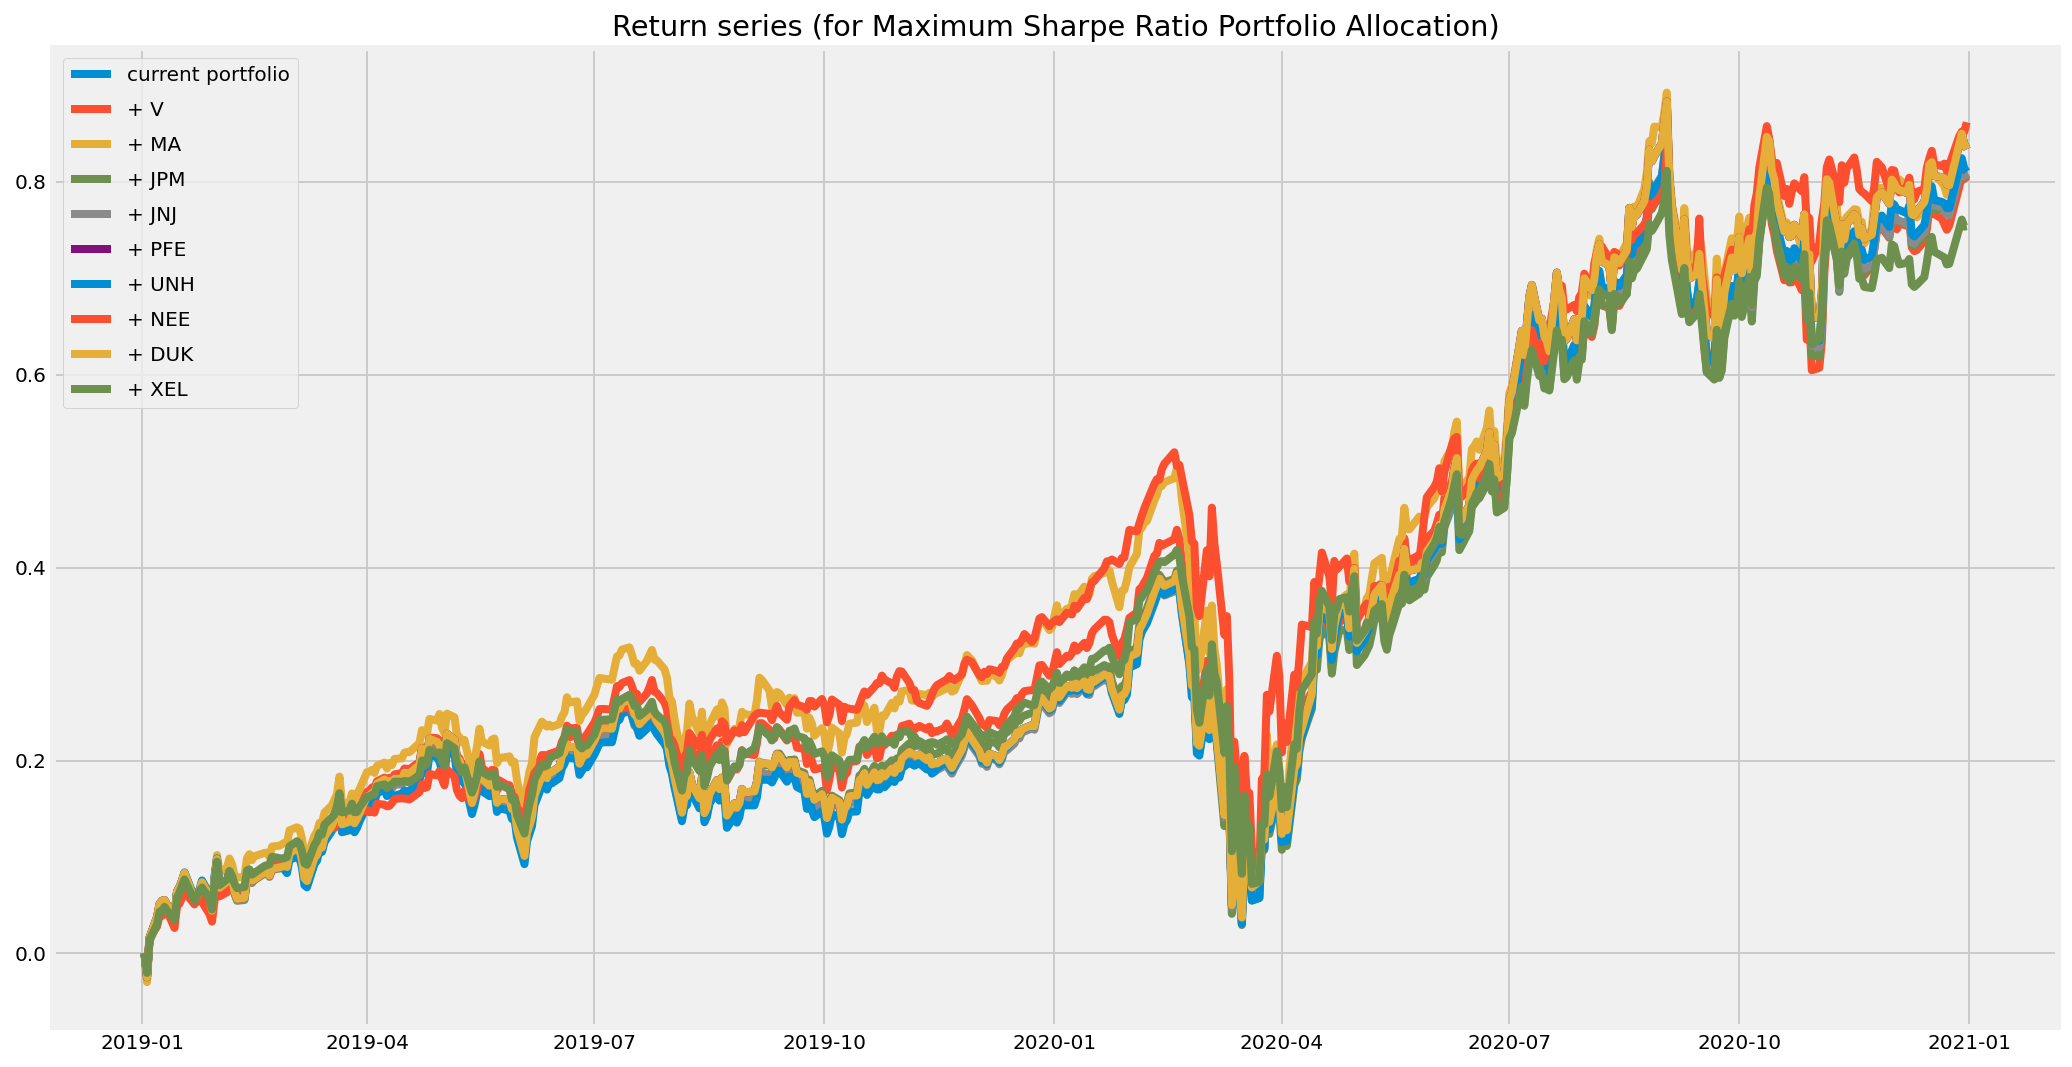

In [ ]:
# ###########################################################
# ## Maximum Sharpe Ratio Portfolio Allocation (plot)
# ###########################################################

# ##Plot the weighted returns and individual returns on the same plot for comparison
# fig, ax = plt.subplots(figsize=(16,9)) 

# ax.plot(return_series_adj_2y, label = 'current portfolio') 

# for sector in sector_res:
#     #portfolio returns
#     weights = [sector[2], sector[3]]
#     sector_closes_2y_return_series_adj = (sector_closes_2y['Adj Close'].pct_change()+ 1).cumprod() - 1 
#     return_series_adj_2y_new_sector= pd.DataFrame(sector_closes_2y_return_series_adj[sector[12]]).join(pd.DataFrame(return_series_adj_2y)).rename(columns={0: 'portfolio'})
#     weighted_return_series_adj = weights* (return_series_adj_2y_new_sector) 

#     #Sum the weighted returns for portfolio
#     df = weighted_return_series_adj.sum(axis=1)/100
#     ax.plot(df, label= "+ "+ sector[12]) 
# ax.set_title("Return series (for Maximum Sharpe Ratio Portfolio Allocation)")
# ax.legend()
# ax.legend(labelspacing=0.8)

In [ ]:
# import json
# result = portfolio_w_inverse_sectors.to_json(orient="records")
# parsed = json.loads(result)
# json.dumps(parsed, indent=4)  


In [ ]:
############################################################
## Minimum Volatility Portfolio Allocation
###########################################################
min_vol_w_inverse_sectors= pd.DataFrame()
min_vol_w_inverse_sectors

min_vol_w_inverse_sectors["current portfolio"]= return_series_adj_2y
# fig, ax = plt.subplots(figsize=(16,9)) 
# ax.plot(return_series_adj_2y, label = 'current portfolio') 

for sector in sector_res:
    #portfolio returns
    weights = [sector[6], sector[7]]

    sector_closes_2y_return_series_adj = (sector_closes_2y['Adj Close'].pct_change()+ 1).cumprod() - 1 
    #include ticker;
    return_series_adj_2y_new_sector= pd.DataFrame(sector_closes_2y_return_series_adj[sector[12]]).join(pd.DataFrame(return_series_adj_2y)).rename(columns={0: 'portfolio'})

    weighted_return_series_adj = weights* (return_series_adj_2y_new_sector) 
    
    #Sum the weighted returns for portfolio
    inverse_portfolio_rs_adj = weighted_return_series_adj.sum(axis=1)/100
    min_vol_w_inverse_sectors["+ "+ sector[12]]= inverse_portfolio_rs_adj
    


In [ ]:
min_vol_w_inverse_sectors

,current portfolio,+ V,+ MA,+ JPM,+ JNJ,+ PFE,+ UNH,+ NEE,+ DUK,+ XEL
Date,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-0.024552,-0.029239,-0.030065,-0.021645,-0.018716,-0.026389,-0.025331,-0.014140,-0.012792,-0.013914
2019-01-04,0.016196,0.011828,0.011882,0.017864,0.005705,0.004408,0.006996,0.016056,0.012169,0.010834
2019-01-07,0.037755,0.031988,0.029724,0.033562,0.008413,0.017255,0.022915,0.026753,0.021185,0.019019
2019-01-08,0.051325,0.042292,0.041624,0.042776,0.028399,0.026027,0.036375,0.037422,0.034299,0.031579
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.796143,0.711983,0.794576,0.667908,0.435232,0.358616,0.695957,0.819660,0.483590,0.598410
2020-12-28,0.838866,0.749489,0.837945,0.701102,0.453179,0.372073,0.732712,0.848156,0.509175,0.626870
2020-12-29,0.849751,0.761341,0.849040,0.707929,0.462022,0.380364,0.742180,0.852050,0.512332,0.633265


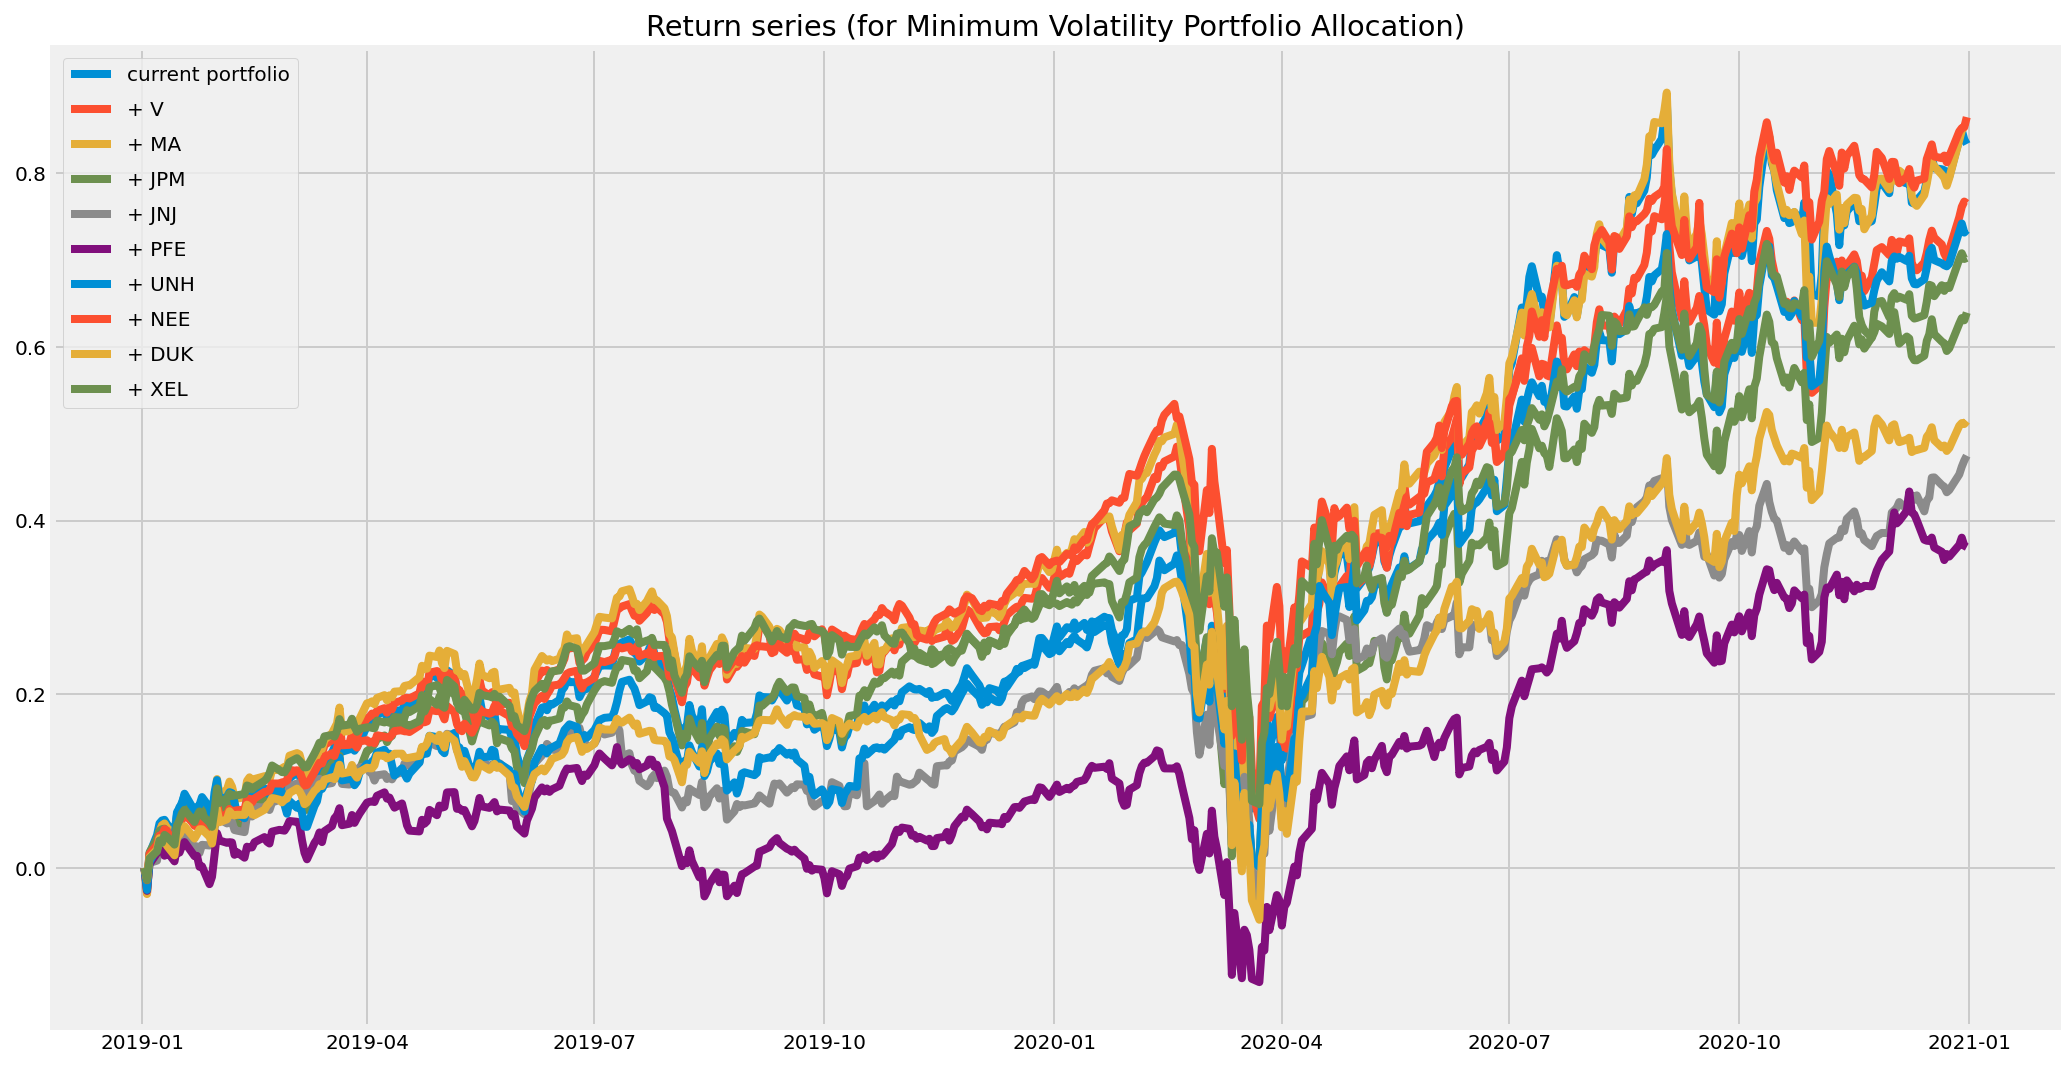

In [ ]:
# ############################################################
# ## Minimum Volatility Portfolio Allocation (plot)
# ###########################################################
# fig, ax = plt.subplots(figsize=(16,9)) 
# ax.plot(return_series_adj_2y, label = 'current portfolio') 

# for sector in sector_res:
#     #portfolio returns
#     weights = [sector[6], sector[7]]

#     sector_closes_2y_return_series_adj = (sector_closes_2y['Adj Close'].pct_change()+ 1).cumprod() - 1 
#     #include ticker;
#     return_series_adj_2y_new_sector= pd.DataFrame(sector_closes_2y_return_series_adj[sector[12]]).join(pd.DataFrame(return_series_adj_2y)).rename(columns={0: 'portfolio'})

#     weighted_return_series_adj = weights* (return_series_adj_2y_new_sector) 

#     #Sum the weighted returns for portfolio
#     df = weighted_return_series_adj.sum(axis=1)/100

#     ax.plot(df, label= "+ "+ sector[12]) 

# ax.set_title("Return series (for Minimum Volatility Portfolio Allocation)")
# ax.legend()
# ax.legend(labelspacing= 0.8)

In [ ]:
# result = min_vol_w_inverse_sectors.to_json(orient="records")
# parsed = json.loads(result)
# json.dumps(parsed, indent=4) 